In [37]:
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_bloch_vector
import numpy as np
%matplotlib inline



In [38]:
sv = []
sv.append([0,1,0])
sv.append([0,0,1])
sv.append([1,0,0])

print(sv)

[[0, 1, 0], [0, 0, 1], [1, 0, 0]]


In [39]:
def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

### ToDo: Adapt to Qiskit and revise output

In [40]:
#SO3
def rn_so3(state, theta, phi, delta):
    rn_mat = qt.Qobj(np.array(
        [[np.cos(delta/2) - (0+1j)*np.cos(theta)*np.sin(delta/2),
          -(0+1j)*np.exp(-(0+1j)*phi)*np.sin(delta/2)*np.sin(theta)],
         [-(0+1j)*np.exp((0+1j)*phi)*np.sin(delta/2)*np.sin(theta),
          np.cos(delta/2) + (0+1j)*np.cos(theta)*np.sin(delta/2)]]
        ))
    r_state = (rn_mat*state)*(rn_mat*state).dag()
    return r_state

In [41]:
fig = plot_bloch_vector(sv)
fig.clear()
#fig.make_sphere()

states = []
points = []

alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
s = np.array([alpha,beta])
state = Statevector(s)
states.append(state)

Ψ = [complex(alpha, 0), complex(beta, 0)]
polar = to_spherical(Ψ)
pnt = to_cartesian(polar)
points.append(pnt)

rotated = state
for i in range(0,10):
    rotated = rn_so3(rotated, 0.4, 0.3, 0.2)
    pnt = [(Statevector.sigmax()*rotated).tr(), (Statevector.sigmay()*rotated).tr(), (Statevector.sigmaz()*rotated).tr()]
    r = np.sqrt(pnt[0]**2+pnt[1]**2+pnt[2]**2)
    states.append(rotated)
    points.append(pnt)

fig.add_states(states)
np_points = np.array(points)
fig.add_points([np_points[:,0], np_points[:,1], np_points[:,2]])
fig.show()

QiskitError: 'Invalid input: not a vector or column-vector.'

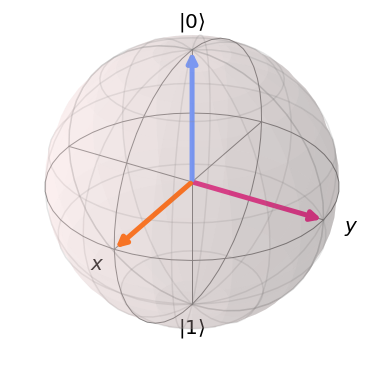

In [ ]:
fig = plot_bloch_vector(sv)
fig